CONTENTS:
- [Description](#description)
  - [Analyzing EIA Time Series Metadata](#analyzing-eia-time-series-metadata)
    - [Introduction](#introduction)
    - [Potential Applications](#potential-applications)
  - [Setup](#setup)
    - [Imports](#imports)
    - [Set Up API Key](#set-up-api-key)
    - [Define Config](#define-config)
  - [Load Metadata](#load-metadata)
  - [Visualize Metadata](#visualize-metadata)
  - [Wrap-up and Insights](#wrap-up-and-insights)
    - [Key Takeaways](#key-takeaways)

<a name='description'></a>
# Description

This notebook demonstrates how to extract and visualize structured metadata from the U.S. Energy Information Administration (EIA) v2 API using the `EiaMetadataDownloader`. It covers how to preview available time series, explore supported frequencies and metrics.

<a name='analyzing-eia-time-series-metadata'></a>
## Analyzing EIA Time Series Metadata

<a name='introduction'></a>
### Introduction

This notebook demonstrates how to use the `EiaMetadataDownloader` class to analyze and construct valid queries from the U.S. Energy Information Administration (EIA) v2 API.
It enables data scientists, analysts, and engineers to extract structured metadata, explore available datasets, and build full queryable URLs for accessing time series data.

The EIA v2 API provides metadata about datasets such as electricity consumption, pricing, and production across various regions and time frequencies.
By programmatically accessing this metadata, you can:
- Discover all frequency-metric combinations available for a dataset
- Retrieve the list of required facet types (e.g., `stateid`, `sectorid`) for each dataset
- Construct full API requests to query time series data
- Automate ingestion by generating API URLs using metadata, even though data availability must still be verified after making the request

This notebook walks through a real-world use case to demonstrate the utility of the metadata downloader.

<a name='potential-applications'></a>
### Potential Applications

The EIA metadata downloader enables a wide range of analytical and operational tasks by making time series metadata programmatically accessible.

Practical use cases include:
- Creating dashboards that track the availability of new metrics or datasets over time
- Automatically generating full EIA API URLs to feed into a data pipeline or fetcher script
- Supporting reproducible energy-related research with clear, programmatically obtained dataset references

<a name='setup'></a>
## Setup

<a name='imports'></a>
### Imports

In [1]:
%load_ext autoreload
%autoreload 2
import logging
import os

import helpers.hdbg as hdbg

import causal_automl.TutorTask401_EIA_metadata_downloader_pipeline.eia_utils as catemdpeu

# Enable logging.
hdbg.init_logger(verbosity=logging.INFO)
_LOG = logging.getLogger(__name__)

INFO  > cmd='/venv/lib/python3.12/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-a664f66c-1335-4eed-9e4d-578fd9ad8163.json'


<a name='set-up-api-key'></a>
### Set Up API Key

Store your **EIA API Key** as an environment variable for security. You can do this in your terminal:

```sh
export EIA_API_KEY="your_personal_api_key"
```

Alternatively, you can set it within the notebook:

In [9]:
# Set your EIA api key here.
os.environ["EIA_API_KEY"] = ""

In [3]:
# Ensure the api key is set correctly.
hdbg.dassert_in(
    "EIA_API_KEY", os.environ, msg="Missing environment variable EIA_API_KEY."
)

# Retrieve it when needed.
api_key = os.getenv("EIA_API_KEY")

<a name='define-config'></a>
### Define Config

This section defines the key parameters that drive the metadata extraction:

- `category`: The root category of interest from the EIA v2 API. Example: `"electricity"`, `"natural-gas"`, `"petroleum"`
- `version_num`: A version label used to tag output files or datasets

In [4]:
# Define category and output version.
category = "electricity"
version_num = "1.0"

<a name='load-metadata'></a>
## Load Metadata

We instantiate the `EiaMetadataDownloader` with a specified category, API key, and version number.

Then, we extract:
- A metadata table containing dataset routes, metrics, and frequencies
- A list of facet values required to construct API queries

In [5]:
# Initialize metadata downloader.
downloader = catemdpeu.EiaMetadataDownloader(
    category=category,
    api_key=api_key,
    version_num=version_num,
)

In [6]:
# Extract metadata.
df_metadata, param_entries = downloader.run_metadata_extraction()

<a name='visualize-metadata'></a>
## Visualize Metadata

In this section, we explore and visualize the structure of the EIA metadata extracted from the API.

We use the flattened metadata table to gain insights into:
- The distribution of time series across different frequencies (e.g., monthly, annual)
- The variety of units used to measure energy-related data (e.g., MWh, USD)
- The number of time series available per dataset ID

These visualizations help assess the coverage, granularity, and diversity of the available EIA datasets before constructing any time series queries.

In [7]:
# Preview metadata.
df_metadata.head()

,url,id,dataset_id,name,description,frequency_id,frequency_alias,frequency_description,frequency_query,frequency_format,facets,data,data_alias,data_units,start_period,end_period,parameter_values_file
0,https://api.eia.gov/v2/electricity/retail-sale...,retail_sales_monthly_revenue,retail_sales,Electricity Sales to Ultimate Customers,Electricity sales to ultimate customer by stat...,monthly,None,One data point for each month.,M,YYYY-MM,"[{'id': 'stateid', 'description': 'State / Cen...",revenue,Revenue from Sales to Ultimate Customers,million dollars,2001-01,2025-02,eia_parameters_v1.0/retail_sales_parameters.csv
1,https://api.eia.gov/v2/electricity/retail-sale...,retail_sales_monthly_sales,retail_sales,Electricity Sales to Ultimate Customers,Electricity sales to ultimate customer by stat...,monthly,None,One data point for each month.,M,YYYY-MM,"[{'id': 'stateid', 'description': 'State / Cen...",sales,Megawatt-hours Sold to Ultimate Customers,million kilowatt hours,2001-01,2025-02,eia_parameters_v1.0/retail_sales_parameters.csv
2,https://api.eia.gov/v2/electricity/retail-sale...,retail_sales_monthly_price,retail_sales,Electricity Sales to Ultimate Customers,Electricity sales to ultimate customer by stat...,monthly,None,One data point for each month.,M,YYYY-MM,"[{'id': 'stateid', 'description': 'State / Cen...",price,Average Price of Electricity to Ultimate Custo...,cents per kilowatt-hour,2001-01,2025-02,eia_parameters_v1.0/retail_sales_parameters.csv
3,https://api.eia.gov/v2/electricity/retail-sale...,retail_sales_monthly_customers,retail_sales,Electricity Sales to Ultimate Customers,Electricity sales to ultimate customer by stat...,monthly,None,One data point for each month.,M,YYYY-MM,"[{'id': 'stateid', 'description': 'State / Cen...",customers,Number of Ultimate Customers,number of customers,2001-01,2025-02,eia_parameters_v1.0/retail_sales_parameters.csv
4,https://api.eia.gov/v2/electricity/retail-sale...,retail_sales_quarterly_revenue,retail_sales,Electricity Sales to Ultimate Customers,Electricity sales to ultimate customer by stat...,quarterly,None,One data point every 3 months.,Q,"YYYY-""Q""Q","[{'id': 'stateid', 'description': 'State / Cen...",revenue,Revenue from Sales to Ultimate Customers,million dollars,2001-01,2025-02,eia_parameters_v1.0/retail_sales_parameters.csv


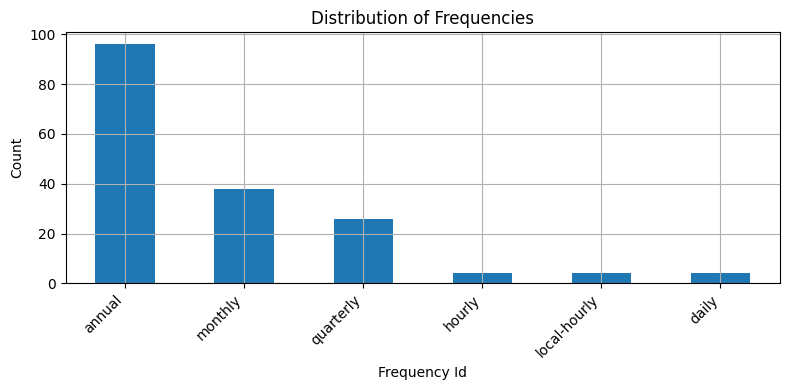

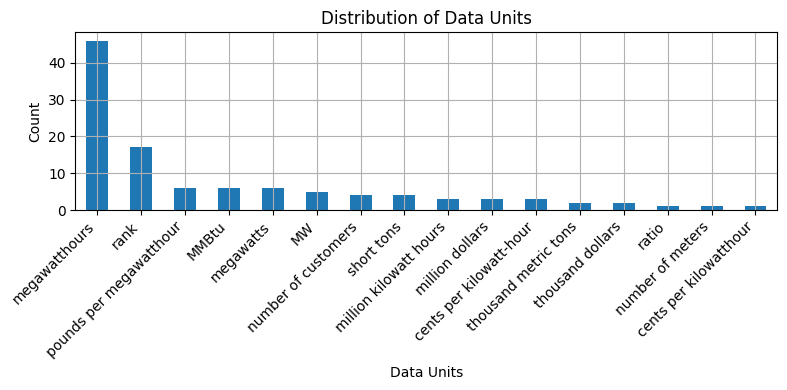

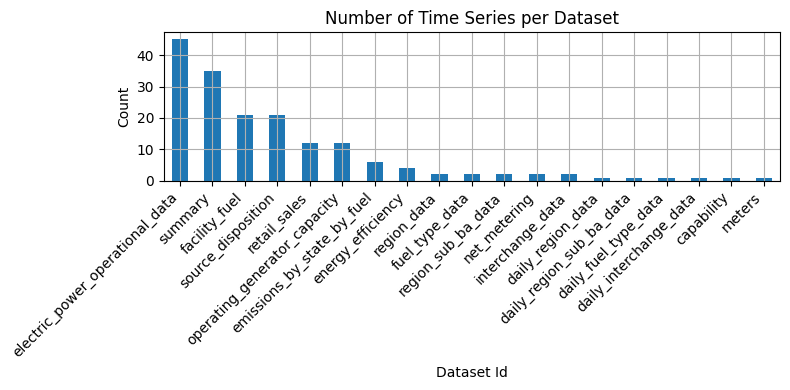

In [8]:
# Frequency distribution plot.
catemdpeu.plot_distribution(
    df_metadata, column="frequency_id", title="Distribution of Frequencies"
)

# Units distribution plot.
catemdpeu.plot_distribution(
    df_metadata, column="data_units", title="Distribution of Data Units"
)

# Number of time serires per dataset plot.
catemdpeu.plot_distribution(
    df_metadata, column="dataset_id", title="Number of Time Series per Dataset"
)

<a name='wrap-up-and-insights'></a>
## Wrap-up and Insights

In this section, we explored the structure of the EIA metadata to understand the coverage and richness of available datasets.

<a name='key-takeaways'></a>
### Key Takeaways

- The flattened metadata table (`df_metadata`) reveals the number of time series per dataset, each defined by a unique combination of frequency and metric
- Distributions of `frequency_id` and `data_units` give insight into the granularity (e.g., monthly, annual) and measurement types (e.g., MWh, USD) used across EIA datasets
- Grouping by `dataset_id` showed how some datasets expose more metric-frequency combinations than others, which is useful when prioritizing which datasets to ingest or analyze further

By analyzing just the metadata, we can assess the overall shape and availability of EIA time series without needing to fetch any actual data. This is especially useful for exploratory analysis, schema understanding, and preparing batch download logic.